# Introduction to plotting

**Notebook currently compatible with the `NCI`|`DEA Sandbox` environment only**

### Description
This introductory notebook demonstrates how to visualise satellite data returned from running a query to the DEA.
The DEA standard practice for plotting invokes simple functions that call to the [dea_plotting.py](https://github.com/GeoscienceAustralia/dea-notebooks/blob/develop/Scripts/dea_plotting.py) script.


### Prerequisites
Users of this notebook should have a basic understanding of
- [running a Jupyter notebook](attach link to relevant notebook)
- [querying the DEA](link to Intro_to_querying notebook)
- [DEA band naming conventions](link to Intro to DEA)

### Technical details
* **Products used:** `ls7_nbart_geomedian_annual`
* **Analyses used:** plotting imagery

## Getting started
To run this introductory tutorial, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages

In [17]:
%matplotlib inline

import sys

sys.path.append("../Scripts")
from dea_plotting import rgb
from dea_plotting import display_map
from dea_plotting import map_shapefile

### Connect to the datacube

In [9]:
import datacube

# Temporary solution to account for Collection 3 data being in a different
# database on the NCI
try:
    dc = datacube.Datacube(app="Introduction_to_plotting", env="c3-samples")
except:
    dc = datacube.Datacube(app="Introduction_to_plotting")

### Analysis parameters

The following variables are required to establish a query for this notebook:
- lat_range: The latitude range to analyse (e.g. (-27.715, -27.755)). For reasonable load times, keep this to a range of ~0.1 degrees or less.
- lon_range: The longitude range to analyse (e.g. (153.42, 153.46)). For reasonable load times, keep this to a range of ~0.1 degrees or less.
- time_range: The date range to analyse (e.g. ('1988', '2018'))


In [38]:
lat_range = (-27.58, -27.666)
lon_range = (153.3, 153.4)
time_range = ("2015", "2016")

## View the queried location
Before running a query and extracting and analysing data, it is useful to double-check that your location is correct.
The `display_map` function shows your selected area over an interactive map.
Clicking on any point of the map will reveal the latitude and longitude coordinates of that point.

In [39]:
display_map(x=lon_range, y=lat_range)

## Query and view data
The variables that were determined above are used here to query the DEA datacube using the `dc.load` function introduced in the [Introduction_to_querying](insert link here).

The `rgb` function enables visualisation of your query and requires the minimum input of:
- your xarray dataset
- 3 bands to combine for display
- which timeslice of the dataset you wish to view, default = 0

In [56]:
data = dc.load(product="ls7_nbart_geomedian_annual",
               x=lon_range,
               y=lat_range,
               time=time_range)

In [57]:
data

<xarray.Dataset>
Dimensions:  (time: 2, x: 450, y: 446)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01 2016-01-01
  * y        (y) float64 -3.165e+06 -3.165e+06 ... -3.176e+06 -3.176e+06
  * x        (x) float64 2.066e+06 2.066e+06 2.066e+06 ... 2.077e+06 2.077e+06
Data variables:
    blue     (time, y, x) int16 245 240 241 258 266 259 ... 368 327 319 264 325
    green    (time, y, x) int16 377 371 376 382 382 390 ... 420 412 382 385 421
    red      (time, y, x) int16 301 273 300 319 308 306 ... 402 372 349 365 419
    nir      (time, y, x) int16 2542 2611 2624 2647 2668 ... 1999 2102 2158 2236
    swir1    (time, y, x) int16 1062 1055 1047 1011 1029 ... 1174 1131 1084 1268
    swir2    (time, y, x) int16 442 442 459 445 445 450 ... 618 562 525 475 581
Attributes:
    crs:      EPSG:3577

The time dimension of your xarray describes how many datasets exist for your location during your nominated time period.
In the `rgb` function, the `index` variable is asking for which timeslice (dataset) you want to view.
Remember: counting in Python begins at 0 so to view the earliest timeslice, your index=0

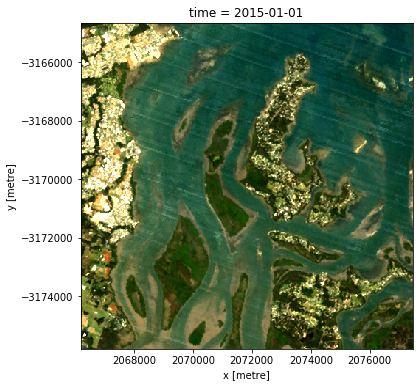

In [49]:
# View a red, green, blue (true colour) image of the earliest timeslice in your xarray
rgb(data,
   bands=['red', 'green', 'blue'],
   index=0)

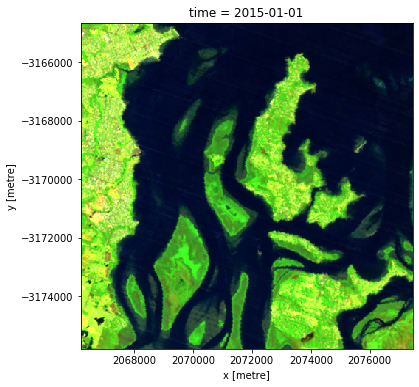

In [50]:
# View a swir1, nir, green (false colour) image of the earliest timeslice in your array
rgb(data,
   bands=['swir1', 'nir', 'green'],
   index=0)

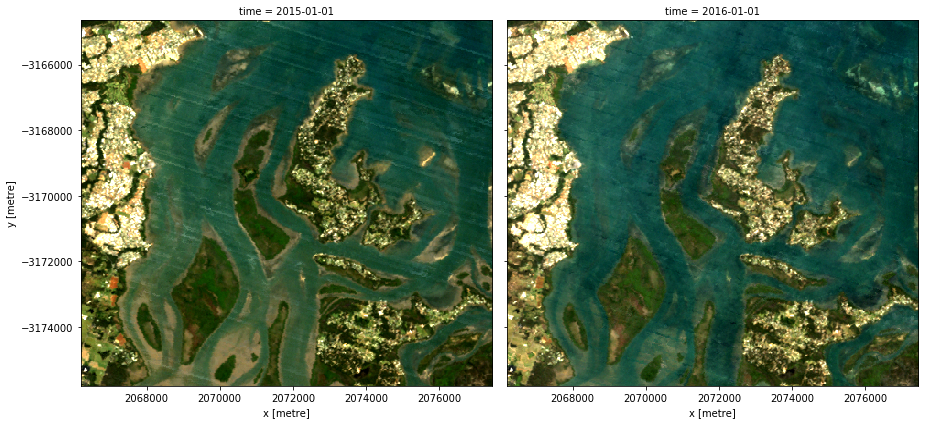

In [54]:
# View the true colour image for each timeslice of your xarray
rgb(data,
   bands=['red', 'green', 'blue'],
   index=[0,-1])

## Recommended next steps
Users who are following the Beginners Guide Introductory series of notebooks are advised to see the following notebooks:
- [Introduction to products](link to notebook)
- [Introduction to measurements](link to notebook)
- [Run a basic analysis](link to notebook)

For advanced plotting and visualisation options, see:
- [dea plotting script](https://github.com/GeoscienceAustralia/dea-notebooks/blob/develop/Scripts/dea_plotting.py)
- [Geomedian composites](https://github.com/GeoscienceAustralia/dea-notebooks/blob/develop/Frequently_used_code/Geomedian_composites.ipynb)
- [Image segmentation](https://github.com/GeoscienceAustralia/dea-notebooks/blob/develop/Frequently_used_code/Image_segmentation.ipynb)
- [Exporting geotiffs](https://github.com/GeoscienceAustralia/dea-notebooks/blob/develop/Frequently_used_code/Exporting_geotiffs.ipynb)


## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** October 2019

**Compatible `datacube` version:** 

In [55]:
print(datacube.__version__)

1.7+43.gc873f3ea.dirty


## Tags
Browse all available tags on the DEA User Guide's [Tags Index](https://docs.dea.ga.gov.au/genindex.html)